In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [2]:
X,y = load_iris(return_X_y = True)

In [3]:
iris_dataframe = pd.DataFrame(X,columns=['sepal length in cm','sepal width in cm','petal length in cm',\
                                         'petal width in cm'])
iris_dataframe['iris class']=y
iris_dataframe['iris class'] = iris_dataframe['iris class'].replace(0,'Iris-Setosa')
iris_dataframe['iris class'] = iris_dataframe['iris class'].replace(1,'Iris-Versicolour')
iris_dataframe['iris class'] = iris_dataframe['iris class'].replace(2,'Iris-Virginica')

In [4]:
iris_dataframe

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,iris class
0,5.1,3.5,1.4,0.2,Iris-Setosa
1,4.9,3.0,1.4,0.2,Iris-Setosa
2,4.7,3.2,1.3,0.2,Iris-Setosa
3,4.6,3.1,1.5,0.2,Iris-Setosa
4,5.0,3.6,1.4,0.2,Iris-Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-Virginica
146,6.3,2.5,5.0,1.9,Iris-Virginica
147,6.5,3.0,5.2,2.0,Iris-Virginica
148,6.2,3.4,5.4,2.3,Iris-Virginica


In [5]:
model_classification = LogisticRegression(random_state=0).fit(X,y)

c:\Users\Golden Snow\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
model_classification = LogisticRegression(random_state=0,max_iter = 1000).fit(X,y)

In [7]:
model_classification.intercept_

array([  9.84977931,   2.23796272, -12.08774203])

In [8]:
model_classification.coef_

array([[-0.42340889,  0.96722201, -2.51717294, -1.07951336],
       [ 0.53440819, -0.32161354, -0.20651822, -0.94415957],
       [-0.1109993 , -0.64560846,  2.72369116,  2.02367293]])

In [9]:
true_values = y
predictions = model_classification.predict(X)
f1_score(true_values,predictions,average='weighted')

0.9733226623982927

##### Obtain the confusion matrix from Python

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
cm = confusion_matrix(y, predictions)
print(cm)

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


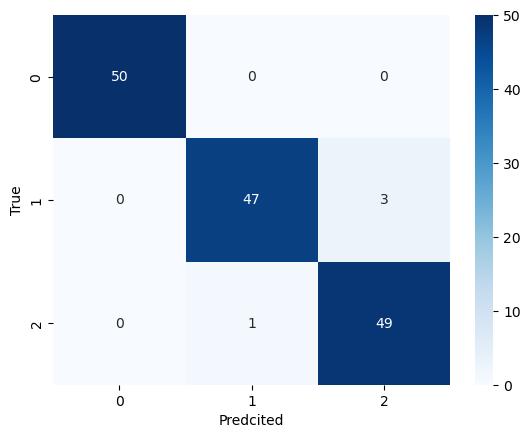

In [17]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predcited')
plt.ylabel('True')
plt.show()

##### Calculate the precision, recall, and F1 Score manually

##### Accuracy: (TP + TN) / (TP + TN + FP + FN)
##### Precision: TP / (TP + FP)
##### Recall: TP / (TP + FN)
##### F1 Score: 2 * Precision * Recall / (Precision + Recall)